# Importing Packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoLocator
from matplotlib.pyplot import hist
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline

# 1.1 Cleaning Messy Outcome Labels


## Loading the cases

In [13]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_test = pd.read_csv('../data/cases_2021_test.csv')

## Outcome Distribution

In [14]:
cases_train.groupby('outcome').size()

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64

## Filling Outcome_Group 


In [15]:
hospitalzed = ['Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition',
'discharge', 'discharged']
nonhospitalized = ['Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition']
deceased = ['Dead', 'Death', 'Deceased', 'Died', 'death', 'died']
recovered = ['Recovered','recovered']


In [16]:
cases_train.loc[cases_train["outcome"].isin(hospitalzed), "outcome_group"] ='hospitalized'
cases_train.loc[cases_train["outcome"].isin(nonhospitalized), "outcome_group"] ='nonhospitalized'
cases_train.loc[cases_train["outcome"].isin(deceased), "outcome_group"] ='deceased'
cases_train.loc[cases_train["outcome"].isin(recovered), "outcome_group"] ='recovered'
cases_train = cases_train.drop(columns="outcome")
cases_train.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized


# 1.3 Exploratory Data Analysis


## Distribution of the attributes

### CASES 2021 TRAIN

In [17]:
by_day=cases_train['date_confirmation'].value_counts().rename_axis('date').reset_index(name='counts')
by_day['date']=pd.to_datetime(by_day['date'], errors='coerce',infer_datetime_format=True)
by_day['counts']=by_day['counts'].astype(int)
by_day=by_day.sort_values(by='date')
by_day=by_day.dropna(axis=0)
totals=[]
totals.append(by_day['counts'].iloc[0])
for i in range(1,137):
       totals.append(totals[i-1]+by_day['counts'].iloc[i])
by_day['totals']=totals
by_day

,date,counts,totals
126,2020-01-06,2,2
130,2020-01-15,1,3
129,2020-01-18,1,4
133,2020-01-20,1,5
123,2020-01-21,3,8
...,...,...,...
3,2020-05-30,8710,189078
1,2020-05-31,9413,198491
6,2020-06-01,7297,205788
124,2020-06-02,2,205790


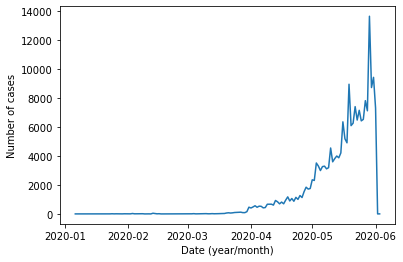

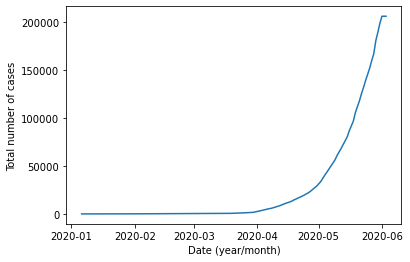

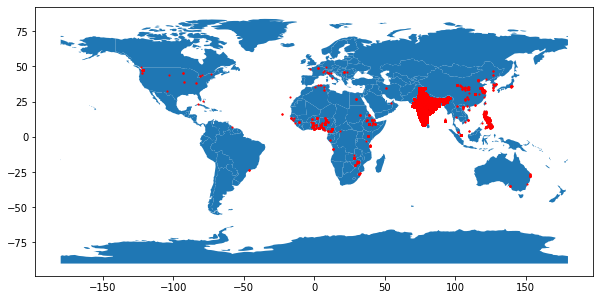

In [24]:
plt.plot(by_day['date'],by_day['counts'])
plt.xlabel('Date (year/month)')
plt.ylabel('Number of cases')
plt.savefig('../plots/fig1.png')
plt.show()
plt.plot(by_day['date'],by_day['totals'])
plt.xlabel('Date (year/month)')
plt.ylabel('Total number of cases')
plt.savefig('../plots/fig2.png')
geometry = [Point(xy) for xy in zip(cases_train['longitude'], cases_train['latitude'])]
gdf = GeoDataFrame(cases_train, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

### CASES 2021 TEST

In [19]:
cases_test1=pd.read_csv('../data/cases_2021_test.csv')
cases_test=cases_test1['country'].value_counts().rename_axis('country').reset_index(name='counts')
cases_test['counts']=cases_test['counts'].astype(int)
cases_test
cases_test=cases_test.drop(labels=0,axis=0)
cases_test=cases_test.drop(labels=1,axis=0)

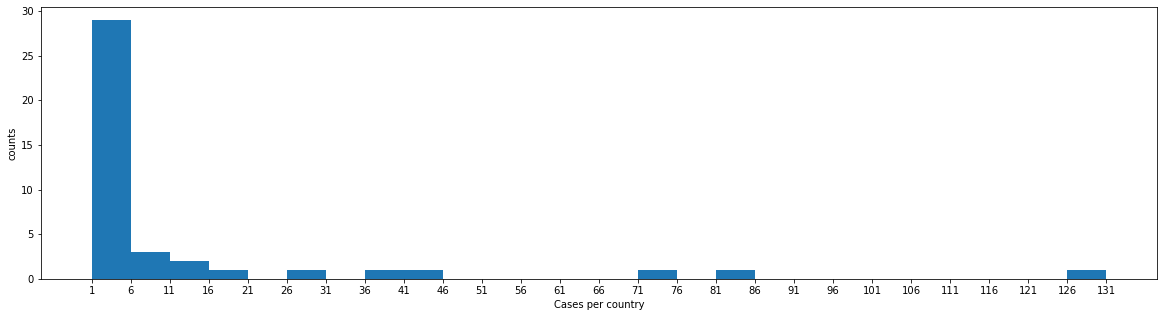

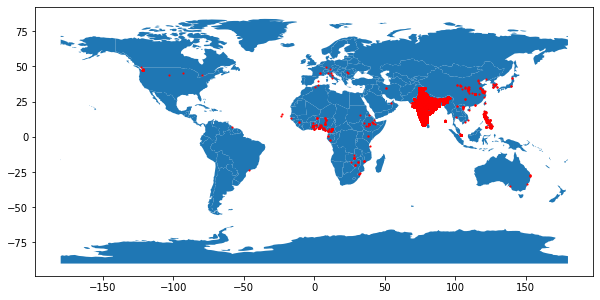

In [22]:
plt.figure(figsize=(20, 5))
plt.hist(cases_test['counts'],bins=26)
plt.xticks(np.linspace(1,131,27))
plt.xlabel('Cases per country')
plt.ylabel('counts')
plt.savefig('../plots/fig3.png')
plt.show()

geometry = [Point(xy) for xy in zip(cases_test1['longitude'], cases_test1['latitude'])]
gdf = GeoDataFrame(cases_test1, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

### LOCATION 2021

In [ ]:
location_data=pd.read_csv('../data/location_2021.csv')
location_data
location_totals=location_data.groupby('Country_Region').sum()
location_totals['Case_Fatality_Ratio']=100*(location_totals['Deaths'].div(location_totals['Confirmed']))
location_totals=location_totals.reset_index()
top10deaths=location_totals.sort_values(by='Deaths',ascending=False).head(10)
top10deaths

In [ ]:
plt.figure(figsize=(15, 15))
plt.bar(top10deaths['Country_Region'],top10deaths['Deaths'])
plt.savefig('../plots/fig4.png')

## Distribution of attributes(Map)

## Number of missing values